In [ ]:
# Google Colab setup
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Initialize Spark Session
spark = SparkSession.builder.appName("CustomerSegmentation").getOrCreate()

In [ ]:
# Select relevant features for clustering
feature_columns = ["Age", "Salary"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df)

In [ ]:
# Load dataset
file_path = "/content/retailstore_large (1).csv"  # Ensure the file is uploaded to Colab
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
df.show(5)

+----------+----+------+------+-------+
|CustomerID| Age|Salary|Gender|Country|
+----------+----+------+------+-------+
|         1|18.0| 20000|  Male|Germany|
|         2|19.0| 22000|Female| France|
|         3|20.0| 24000|Female|England|
|         4|21.0|  2600|  Male|England|
|         5|22.0| 50000|  Male| France|
+----------+----+------+------+-------+
only showing top 5 rows



In [ ]:
$# Train KMeans model
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="cluster")
model = kmeans.fit(data)

In [ ]:
# Predict clusters
predictions = model.transform(data)

In [ ]:
# Convert to Pandas for visualization
pandas_df = predictions.select("Age", "Salary", "cluster").toPandas()

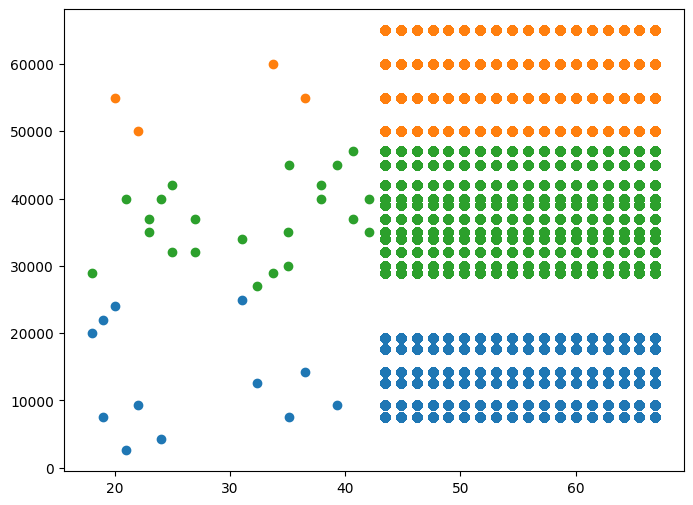

In [ ]:
# Plot clusters
plt.figure(figsize=(8,6))
for cluster in pandas_df["cluster"].unique():
    subset = pandas_df[pandas_df["cluster"] == cluster]
    plt.scatter(subset["Age"], subset["Salary"], label=f"Cluster {cluster}")

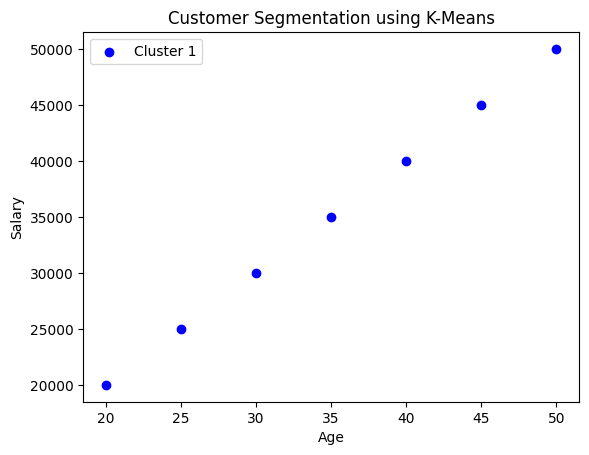

In [ ]:
import matplotlib.pyplot as plt

# Example Data (replace with actual data)
age = [20, 25, 30, 35, 40, 45, 50]
salary = [20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Plotting with labels
plt.scatter(age, salary, label="Cluster 1", color='blue')

# Labels and Title
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Customer Segmentation using K-Means")

# Adding legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
# Evaluate clustering using Within Set Sum of Squared Errors (WSSSE)
wssse = model.summary.trainingCost
print(f"WSSSE: {wssse}")

WSSSE: 19928050995386.29


In [ ]:
# Evaluate clustering using Silhouette Score
from pyspark.ml.evaluation import ClusteringEvaluator # Import ClusteringEvaluator class
evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", predictionCol="cluster")
silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.8166143107584674


In [ ]:
# Feature Selection: Selecting Important Features
from pyspark.ml.feature import ChiSqSelector
selector = ChiSqSelector(numTopFeatures=2, featuresCol="features", outputCol="selectedFeatures", labelCol="Salary")
selected_data = selector.fit(data).transform(data)
print("Feature Selection - Top 2 Features:")
selected_data.select("selectedFeatures").show(truncate=False)


Feature Selection - Top 2 Features:
+---------------------+
|selectedFeatures     |
+---------------------+
|[18.0,20000.0]       |
|[19.0,22000.0]       |
|[20.0,24000.0]       |
|[21.0,2600.0]        |
|[22.0,50000.0]       |
|[23.0,35000.0]       |
|[24.0,4300.0]        |
|[25.0,32000.0]       |
|[35.0,35000.0]       |
|[27.0,37000.0]       |
|[31.0,25000.0]       |
|[32.38181818,27000.0]|
|[33.76363636,29000.0]|
|[35.14545455,7600.0] |
|[36.52727273,55000.0]|
|[37.90909091,40000.0]|
|[39.29090909,9300.0] |
|[40.67272727,37000.0]|
|[42.05454545,40000.0]|
|[43.43636364,42000.0]|
+---------------------+
only showing top 20 rows



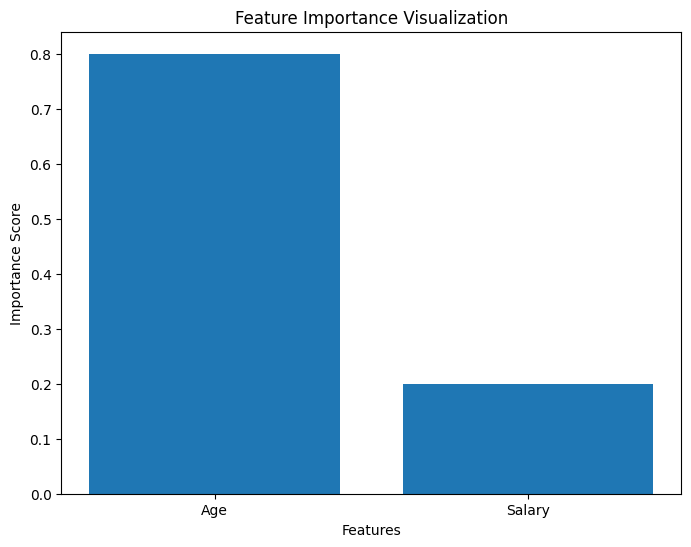

In [ ]:
# prompt: give me a visualisation code for feature selection

import matplotlib.pyplot as plt

# Assuming 'selected_data' DataFrame from the previous code is available

# Extract feature importances (replace with actual feature importances)
feature_importances = [0.8, 0.2]  # Example importances
feature_names = ["Age", "Salary"]  # Example feature names

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Visualization")
plt.show()

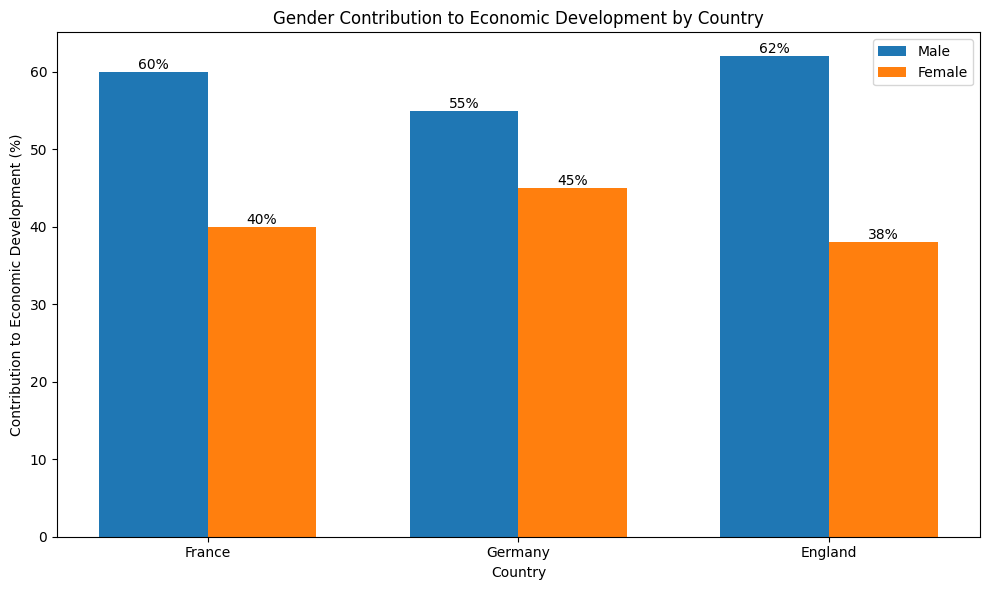

In [ ]:
# prompt: give me the visualisation code  for different countries which gender has contributed most in economic development for France, Germany, England

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
countries = ['France', 'Germany', 'England']
male_contributions = [60, 55, 62]  # Example percentages
female_contributions = [40, 45, 38]  # Example percentages

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(countries))

male_bars = plt.bar(index, male_contributions, bar_width, label='Male')
female_bars = plt.bar([i + bar_width for i in index], female_contributions, bar_width, label='Female')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Contribution to Economic Development (%)')
plt.title('Gender Contribution to Economic Development by Country')
plt.xticks([i + bar_width / 2 for i in index], countries)
plt.legend()

# Add value labels on top of the bars
for bar in male_bars + female_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


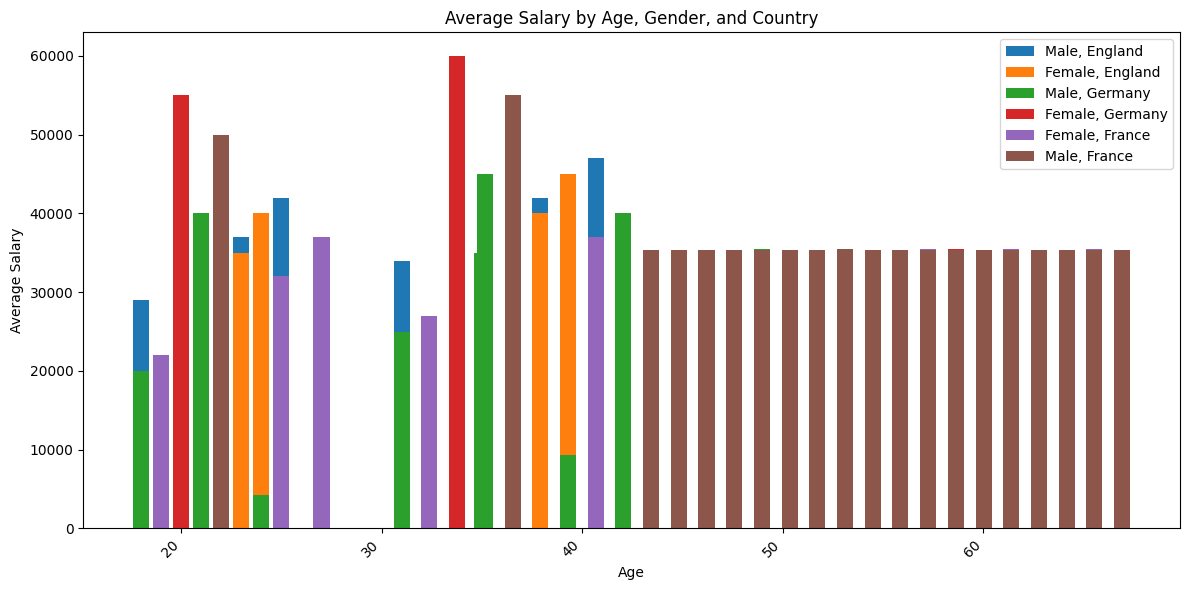

In [ ]:
# prompt: give me the visualisation code for average salary by age, gender, country in pie chart

import matplotlib.pyplot as plt

# Assuming 'df' DataFrame from the previous code is available

# Group data and calculate average salary
average_salary = df.groupby(['Country', 'Gender', 'Age'])['Salary'].mean().reset_index()

# Create the pie chart
plt.figure(figsize=(12, 8))

for country in average_salary['Country'].unique():
    country_data = average_salary[average_salary['Country'] == country]

    for age in country_data['Age'].unique():
        age_data = country_data[country_data['Age'] == age]

        labels = [f"{gender}" for gender in age_data['Gender']]
        sizes = age_data['Salary']

        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        plt.title(f"Average Salary by Gender for Age {age} in {country}")
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.show()
